In [1]:
# Import Dependencies
import os
import pandas as pd
import numpy as np
import requests
import json
import pprint
import matplotlib
import matplotlib.pyplot as plt
from config import (aqs_api_key)
from config import (email_address)


# https://aqs.epa.gov/aqsweb/documents/data_api.html#signup for api information
pp = pprint.PrettyPrinter(indent = 4)
states_url = "https://aqs.epa.gov/data/api/list/states"
parameters_url = "https://aqs.epa.gov/data/api/list/classes"
daily_data_url = "https://aqs.epa.gov/data/api/dailyData/byState"
annual_data_url = "https://aqs.epa.gov/data/api/annualData/byState"
p1 = {"email" : email_address, "key" : aqs_api_key}

# States to be used and their ID Codes, All in top 10 for worst congestion and traffic
California = "06"
District_of_Columbia = "11"
New_York = "36"
Massachusetts = "25"
Illinois = "17"

cali_data = []
hawaii_data = []
ny_data = []
dc_data = []
mass_cm_19_data = []
mass_cm_20_data = []
mass_pm_19_data = []
mass_pm_20_data = []
mass_oz_19_data = []
mass_oz_20_data = []
illinois_nd_19_data = []
illinois_nd_20_data = []
illinois_sd_19_data = []
illinois_sd_20_data = []
illinois_cm_19_data = []
illinois_cm_20_data = []
illinois_pm_19_data = []
illinois_pm_20_data = []
illinois_oz_19_data = []
illinois_oz_20_data = []

In [ ]:
# Create a DataFrame for California and pull carbon monoxide data from API
# cali_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
#           "bdate" : "20200101", "edate" : "20200801", "state" : California}

# # Call to url
# cali_response = requests.get(sample_data_url, params = cali_params).json()
# cali_data.append(cali_response)

# cali_df = pd.DataFrame(cali_data[0]["Data"])
# cali_df.head()


In [ ]:
# clean_cali_df=cali_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name","event_type","validity_indicator","method_code"], axis=1)


In [ ]:
# cali_df.isnull()

In [ ]:
# cali_df.nsmallest(3, 'first_max_value')

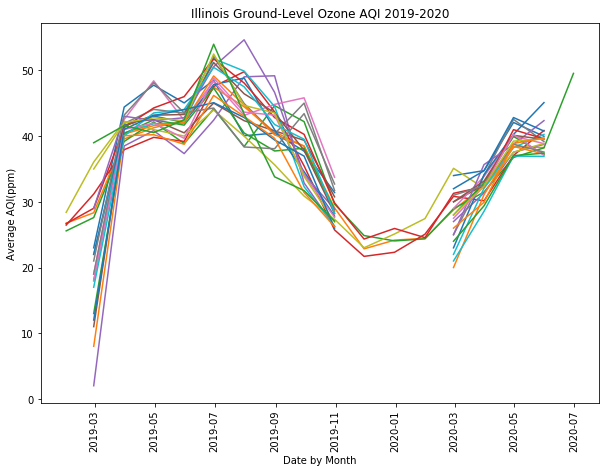

In [2]:
#Illinois 2019 and 2020 ozone 44201

illinois_oz_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_oz_19_response = requests.get(daily_data_url, params = illinois_oz_19_params).json()
illinois_oz_19_data.append(illinois_oz_19_response)

illinois_oz_19_df = pd.DataFrame(illinois_oz_19_data[0]["Data"])

# create DF for Illinois 2020 and pull PM 2.5 from APi
illinois_oz_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_oz_20_response = requests.get(daily_data_url, params = illinois_oz_20_params).json()
illinois_oz_20_data.append(illinois_oz_20_response)

#create df for illinois 2020
illinois_oz_20_df = pd.DataFrame(illinois_oz_20_data[0]["Data"])
illinois_oz_20_df
#merge 2020
merge_illinois_oz_df = illinois_oz_19_df.append(illinois_oz_20_df)
# merge_illinois_oz_df.head()

#drop columns in Illinois DF. ozone Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_oz_clean_df = merge_illinois_oz_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_oz_clean_df.head()



#run ozone by 8 Hour Sample (used 24 hours because it provided a longer time frame, 8 hour only shows one year, 1 hour is nothing)
sample_duration_oz = illinois_oz_clean_df["sample_duration"] == "8-HR RUN AVG BEGIN HOUR"
sample_duration_oz

illinois_oz_clean_df = illinois_oz_clean_df[sample_duration_oz]
# illinois_oz_clean_df.head()

#group Iliinois data ozone in dataframe with groupby
illinois_oz_group = pd.DataFrame(illinois_oz_clean_df.groupby(["date_local","county"]).mean().unstack())
illinois_oz_group.index
#convert index to datetime
illinois_oz_group.index = pd.to_datetime(illinois_oz_group.index)
#average data by months
monthly_oz_averages = illinois_oz_group.resample('M').mean()

# #plot aqi against time for each county ozone in group by df
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation = 90)
x_values = monthly_oz_averages.index
y_values = monthly_oz_averages['aqi']
plt.plot(x_values,y_values)
plt.xlabel('Date by Month')
plt.ylabel('Average AQI(ppm)')
plt.title('Illinois Ground-Level Ozone AQI 2019-2020')
fig.savefig('plotozone.png')



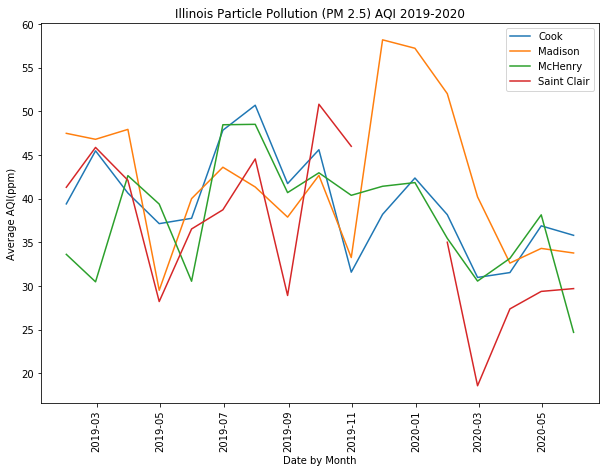

In [3]:

#Illinois 2019 and 2020 PM2.5

illinois_pm_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_pm_19_response = requests.get(daily_data_url, params = illinois_pm_19_params).json()
illinois_pm_19_data.append(illinois_pm_19_response)

illinois_pm_19_df = pd.DataFrame(illinois_pm_19_data[0]["Data"])

# create DF for Illinois 2020 and pull PM 2.5 from APi
illinois_pm_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_pm_20_response = requests.get(daily_data_url, params = illinois_pm_20_params).json()
illinois_pm_20_data.append(illinois_pm_20_response)

#create df for illinois 2020
illinois_pm_20_df = pd.DataFrame(illinois_pm_20_data[0]["Data"])
illinois_pm_20_df
#merge 2020
merge_illinois_pm_df = illinois_pm_19_df.append(illinois_pm_20_df)
# merge_illinois_pm_df.head()


#drop columns in Illinois DF.nitrogen dioxide Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_pm_clean_df = merge_illinois_pm_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
# illinois_pm_clean_df.head()

#run nitrogen dioxideby 1 hour sample - only option
sample_duration_pm = illinois_pm_clean_df["sample_duration"] == "24-HR BLK AVG"
sample_duration_pm

illinois_pm_clean_df = illinois_pm_clean_df[sample_duration_pm]
# illinois_pm_clean_df.head()
#group Iliinois data PM in dataframe with groupby
illinois_pm_group = pd.DataFrame(illinois_pm_clean_df.groupby(["date_local","county"]).mean().unstack())
illinois_pm_group.index
#convert index to datetime
illinois_pm_group.index = pd.to_datetime(illinois_pm_group.index)
#average data by months
monthly_pm_averages = illinois_pm_group.resample('M').mean()

# #plot aqi against time for each county PM in group by df
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation = 90)
x_values = monthly_pm_averages.index
y_values = monthly_pm_averages['aqi']

plt.xlabel('Date by Month')
plt.ylabel('Average AQI(ppm)')
plt.title('Illinois Particle Pollution (PM 2.5) AQI 2019-2020')

plt.plot(x_values,y_values)
plt.legend(y_values)

fig.savefig('plotPM2.5.png')
#needto add title, x axis labels include units of meausres, need to add legend for counties

In [ ]:
# # # Illinois 2019 and 2020 data for sulfur DIOXIDE

# illinois_sd_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42401", 
#           "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # # # Call to url for Illinois 2019
# illinois_sd_19_response = requests.get(daily_data_url, params = illinois_sd_19_params).json()
# illinois_sd_19_data.append(illinois_sd_19_response)

# illinois_sd_19_df = pd.DataFrame(illinois_sd_19_data[0]["Data"])

# # # create DF for Illinois 2020 and pull sulfur Data from APi
# illinois_sd_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42401", 
#           "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

# # #call url for Illinois 2020
# illinois_sd_20_response = requests.get(daily_data_url, params = illinois_sd_20_params).json()
# illinois_sd_20_data.append(illinois_sd_20_response)

# # #create df for illinois 2020
# illinois_sd_20_df = pd.DataFrame(illinois_sd_20_data[0]["Data"])
# illinois_sd_20_df
# #merge 2020
# merge_illinois_sd_df = illinois_sd_19_df.append(illinois_sd_20_df)
# merge_illinois_sd_df.head()

In [ ]:
# # #drop columns in Illinois DF. Sulfur Dioxide Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
# illinois_clean_sd_df = merge_illinois_sd_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
# illinois_clean_sd_df

# # isolate data to 1 hour hour duration only sulfur dioxide; 24 and 3 hour samples are null

# sample_duration_sd = illinois_clean_sd_df["sample_duration"] == "1 HOUR"
# sample_duration_sd

# illinois_clean_sd_df = illinois_clean_sd_df[sample_duration_sd]
# illinois_clean_sd_df.head()

# #group Iliinois data sulfur dioxide in dataframe with groupby
# illinois_group_sd = pd.DataFrame(illinois_clean_sd_df.groupby(["date_local","county"]).mean().unstack())
# illinois_group_sd.index
# #convert index to datetime
# illinois_group_sd.index = pd.to_datetime(illinois_group_sd.index)
# #average data by months
# monthly_averages_sd = illinois_group_sd.resample('M').mean()


# # #plot aqi against time for each county sulfur dioxide in group by df
# fig, ax = plt.subplots(figsize=(18,12))
# plt.xticks(rotation = 90)
# x_values = monthly_averages_sd.index
# y_values = monthly_averages_sd['aqi']
# plt.plot(x_values,y_values)
# plt.xlabel('Date by Month')
# plt.ylabel('Average AQI(ppm)')
# plt.title('Illinois Sulfur Dioxide AQI 2019-2020')

# plt.plot(x_values,y_values)
# plt.legend(y_values)
# fig.savefig('plotsulfur.png')

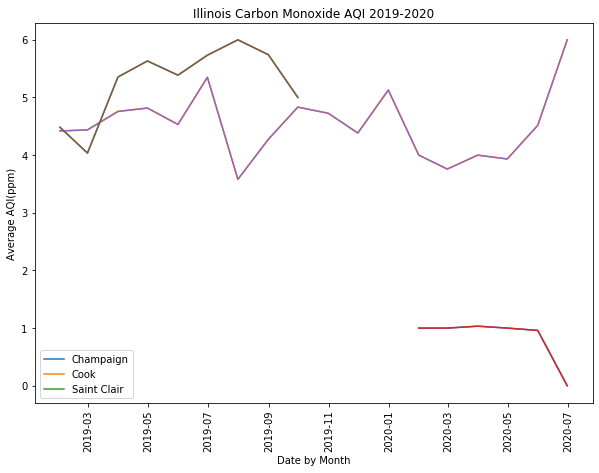

In [11]:
# Create a DataFrame for Illinois 2019 and pull carbon monoxide data from API
illinois_cm_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_cm_19_response = requests.get(daily_data_url, params = illinois_cm_19_params).json()
illinois_cm_19_data.append(illinois_cm_19_response)

illinois_cm_19_df = pd.DataFrame(illinois_cm_19_data[0]["Data"])

#create DF for Illinois 2020 and pull Carbon Monoxide Data from APi
illinois_cm_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_cm_20_response = requests.get(daily_data_url, params = illinois_cm_20_params).json()
illinois_cm_20_data.append(illinois_cm_20_response)

#create df for illinois 2020
illinois_cm_20_df = pd.DataFrame(illinois_cm_20_data[0]["Data"])
# illinois_cm_20_df
#merge 2020
merge_illinois_cm_df = illinois_cm_19_df.append(illinois_cm_20_df)
# merge_illinois_cm_df.head()

#drop columns in Illinois DF. Carbon Monoxide Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_clean_cm_df = merge_illinois_cm_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
# illinois_clean_cm_df.head()

# isolate data to 8 hour duration only carbond monoxide, 1 hour is null

sample_duration_cm = illinois_clean_cm_df["sample_duration"] == "8-HR RUN AVG END HOUR"
sample_duration_cm

illinois_clean_cm_df = illinois_clean_cm_df[sample_duration_cm]
illinois_clean_cm_df.head()

#group Iliinois carbon monoxide data in dataframe with groupby
illinois_group_cm= pd.DataFrame(illinois_clean_cm_df.groupby(["date_local","county"]).mean().unstack())
illinois_group_cm.index
#convert index to datetime
illinois_group_cm.index = pd.to_datetime(illinois_group_cm.index)
#average data by months
monthly_averages_cm = illinois_group_cm.resample('M').mean()
# elimiate nans
# illinois_cm_df =monthly_averages_cm.fillna(0)
# illinois_cm_df
# illinois_cm_df.index

#plot aqi against time for each county cardbon monoxide in group by df
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation = 90)
x_values = monthly_averages_cm.index
y_values = monthly_averages_cm['aqi']
plt.plot(x_values,y_values)
plt.xlabel('Date by Month')
plt.ylabel('Average AQI(ppm)')
plt.title('Illinois Carbon Monoxide AQI 2019-2020')

plt.plot(x_values,y_values)
plt.legend(y_values)
fig.savefig('plotCarbon.png')


In [ ]:
# # Create a DataFrame for District of Columbia and pull carbon monoxide data from API
# dc_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
#           "bdate" : "20200101", "edate" : "20200801", "state" : District_of_Columbia}

# # Call to url
# dc_response = requests.get(sample_data_url, params = dc_params).json()
# dc_data.append(dc_response)

# dc_df = pd.DataFrame(dc_data[0]["Data"])
# dc_df.head()

In [ ]:
# # Create a DataFrame for New York and pull carbon monoxide data from API
# ny_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
#           "bdate" : "20200101", "edate" : "20200801", "state" : New_York}

# # Call to url
# ny_response = requests.get(sample_data_url, params = ny_params).json()
# ny_data.append(ny_response)

# ny_df = pd.DataFrame(ny_data[0]["Data"])
# ny_df.head()

In [5]:
# Create a DataFrame for Mass and pull carbon monoxide data from API

# Pull from 2019 and 2020 to merge, api does not allow pulls from multiple years together.
#2019
mass_params_cm_19 = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Massachusetts}

    # Call to url
mass_cm_19_response = requests.get(daily_data_url, params = mass_params_cm_19).json()
mass_cm_19_data.append(mass_cm_19_response)

mass_cm_19_df = pd.DataFrame(mass_cm_19_data[0]["Data"])

#2020
mass_params_cm_20 = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : Massachusetts}

    # Call to url
mass_cm_20_response = requests.get(daily_data_url, params = mass_params_cm_20).json()
mass_cm_20_data.append(mass_cm_20_response)

mass_cm_20_df = pd.DataFrame(mass_cm_20_data[0]["Data"])

# Merge 2019 and 2020 data
merge_mass_cm_df = mass_cm_19_df.append(mass_cm_20_df)
# merge_mass_df
# Drop unnecessary columns to clean DF
clean_mass_cm_df = merge_mass_cm_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name",
                            "event_type","validity_indicator","method_code","state_code","county_code",
                            "site_number","parameter","pollutant_standard","units_of_measure","method",
                            "site_address","cbsa","observation_count","observation_percent"], axis=1)

clean_mass_cm_df

,latitude,longitude,sample_duration,date_local,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city,date_of_last_change
0,42.329500,-71.082600,1 HOUR,2019-01-01,0.181545,0.207,14,NaN,Massachusetts,Suffolk,Boston,2020-03-02
1,42.329500,-71.082600,8-HR RUN AVG END HOUR,2019-01-01,0.200000,0.200,5,2.0,Massachusetts,Suffolk,Boston,2020-03-02
2,42.329500,-71.082600,1 HOUR,2019-01-02,0.226217,0.446,17,NaN,Massachusetts,Suffolk,Boston,2020-03-02
3,42.329500,-71.082600,8-HR RUN AVG END HOUR,2019-01-02,0.229167,0.300,17,3.0,Massachusetts,Suffolk,Boston,2020-03-02
4,42.329500,-71.082600,1 HOUR,2019-01-03,0.265565,0.381,9,NaN,Massachusetts,Suffolk,Boston,2020-03-02
...,...,...,...,...,...,...,...,...,...,...,...,...
578,42.120229,-72.584503,8-HR RUN AVG END HOUR,2020-01-04,0.779167,0.900,0,10.0,Massachusetts,Hampden,Springfield,2020-03-13
579,42.120229,-72.584503,1 HOUR,2020-01-05,0.166652,0.291,23,NaN,Massachusetts,Hampden,Springfield,2020-03-13
580,42.120229,-72.584503,8-HR RUN AVG END HOUR,2020-01-05,0.170833,0.300,0,3.0,Massachusetts,Hampden,Springfield,2020-03-13
581,42.120229,-72.584503,1 HOUR,2020-01-06,0.276625,0.405,6,NaN,Massachusetts,Hampden,Springfield,2020-03-13


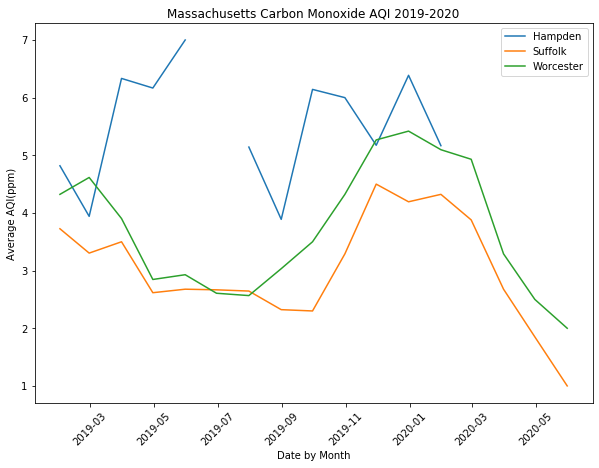

In [6]:
# Filter out the 1-hour sample_duration and fix any null values
sample_duration_cm = clean_mass_cm_df['sample_duration'] == '8-HR RUN AVG END HOUR'
clean_mass_cm_df = clean_mass_cm_df[sample_duration_cm]

# Groupby date and fix null values
group_mass_cm = pd.DataFrame(clean_mass_cm_df.groupby(['date_local', 'county']).mean().unstack())
# group_mass = group_mass.fillna(0)
# Convert the date_local in the index into 'datetime' format
group_mass_cm.index = pd.to_datetime(group_mass_cm.index)

# Average out data on a per month basis
mass_monthly_cm = group_mass_cm.resample('M').mean()
# mass_monthly_cm.head()

# Create first Line Chart for first_max_value of CO and data_local for Mass_df
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation = 45)
xvalue = mass_monthly_cm.index
yvalue = mass_monthly_cm['aqi']

plt.xlabel('Date by Month')
plt.ylabel('Average AQI(ppm)')
plt.title('Massachusetts Carbon Monoxide AQI 2019-2020')
plt.plot(xvalue, yvalue)
plt.legend(yvalue)
fig.savefig('MassplotCM.png')


In [7]:
#Ozone Mass

mass_params_oz_19 = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Massachusetts}

    # Call to url
mass_oz_19_response = requests.get(daily_data_url, params = mass_params_oz_19).json()
mass_oz_19_data.append(mass_oz_19_response)

mass_oz_19_df = pd.DataFrame(mass_oz_19_data[0]["Data"])

#2020
mass_params_oz_20 = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20200101", "edate" : "20200801", "state" : Massachusetts}

    # Call to url
mass_oz_20_response = requests.get(daily_data_url, params = mass_params_oz_20).json()
mass_oz_20_data.append(mass_oz_20_response)

mass_oz_20_df = pd.DataFrame(mass_oz_20_data[0]["Data"])

# Merge 2019 and 2020 data
merge_mass_oz_df = mass_oz_19_df.append(mass_oz_20_df)
# merge_mass_df

# Drop unnecessary columns to clean DF
clean_mass_oz_df = merge_mass_oz_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name",
                            "event_type","validity_indicator","method_code","state_code","county_code",
                            "site_number","parameter","pollutant_standard","units_of_measure","method",
                            "site_address","cbsa","observation_count","observation_percent"], axis=1)

clean_mass_oz_df


,latitude,longitude,sample_duration,date_local,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city,date_of_last_change
0,42.474642,-70.970816,1 HOUR,2019-01-01,0.027478,0.038,3,NaN,Massachusetts,Essex,Lynn,2020-03-02
1,42.474642,-70.970816,8-HR RUN AVG BEGIN HOUR,2019-01-01,0.026583,0.032,0,30.0,Massachusetts,Essex,Lynn,2020-03-02
2,42.474642,-70.970816,8-HR RUN AVG BEGIN HOUR,2019-01-01,0.026583,0.032,0,30.0,Massachusetts,Essex,Lynn,2020-03-02
3,42.474642,-70.970816,8-HR RUN AVG BEGIN HOUR,2019-01-01,0.026118,0.031,23,29.0,Massachusetts,Essex,Lynn,2020-03-02
4,42.474642,-70.970816,1 HOUR,2019-01-02,0.030208,0.036,13,NaN,Massachusetts,Essex,Lynn,2020-03-02
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,42.452299,-73.239648,8-HR RUN AVG BEGIN HOUR,2020-04-29,0.043765,0.047,9,44.0,Massachusetts,Berkshire,Pittsfield,2020-07-07
8486,42.452299,-73.239648,1 HOUR,2020-04-30,0.038750,0.041,19,NaN,Massachusetts,Berkshire,Pittsfield,2020-07-07
8487,42.452299,-73.239648,8-HR RUN AVG BEGIN HOUR,2020-04-30,0.038211,0.039,0,36.0,Massachusetts,Berkshire,Pittsfield,2020-07-07
8488,42.452299,-73.239648,8-HR RUN AVG BEGIN HOUR,2020-04-30,0.038211,0.039,0,36.0,Massachusetts,Berkshire,Pittsfield,2020-07-07


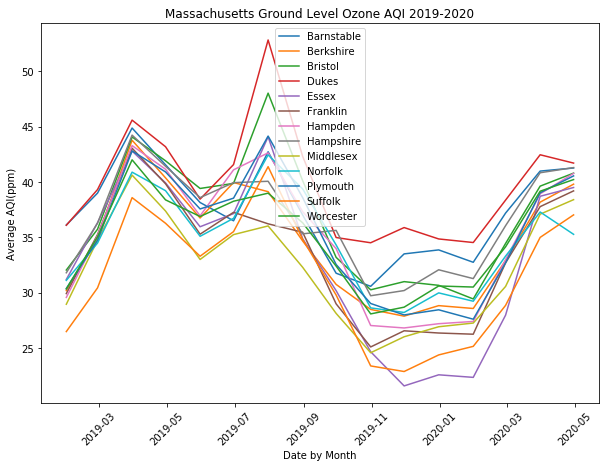

In [8]:
# Filter out the 1-hour sample_duration and fix any null values
sample_duration_oz = clean_mass_oz_df['sample_duration'] == '8-HR RUN AVG BEGIN HOUR'
clean_mass_oz_df = clean_mass_oz_df[sample_duration_oz]

# Groupby date and fix null values
group_mass_oz = pd.DataFrame(clean_mass_oz_df.groupby(['date_local', 'county']).mean().unstack())
# group_mass = group_mass.fillna(0)

# Convert the date_local in the index into 'datetime' format
group_mass_oz.index = pd.to_datetime(group_mass_oz.index)

# Average out data on a per month basis
mass_monthly_oz = group_mass_oz.resample('M').mean()
# mass_monthly_oz.head()

# Create first Line Chart for first_max_value of CO and data_local for Mass_df
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation = 45)
xvalue = mass_monthly_oz.index
yvalue = mass_monthly_oz['aqi']

plt.xlabel('Date by Month')
plt.ylabel('Average AQI(ppm)')
plt.title('Massachusetts Ground Level Ozone AQI 2019-2020')
plt.plot(xvalue, yvalue)
plt.legend(yvalue)
fig.savefig('MassplotOZ.png')

In [9]:
#PM2.5  Mass

mass_params_pm_19 = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Massachusetts}

    # Call to url
mass_pm_19_response = requests.get(daily_data_url, params = mass_params_pm_19).json()
mass_pm_19_data.append(mass_pm_19_response)

mass_pm_19_df = pd.DataFrame(mass_pm_19_data[0]["Data"])

#2020
mass_params_pm_20 = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20200101", "edate" : "20200401", "state" : Massachusetts}

    # Call to url
mass_pm_20_response = requests.get(daily_data_url, params = mass_params_pm_20).json()
mass_pm_20_data.append(mass_pm_20_response)

mass_pm_20_df = pd.DataFrame(mass_pm_20_data[0]["Data"])

# Merge 2019 and 2020 data
merge_mass_pm_df = mass_pm_19_df.append(mass_pm_20_df)
# merge_mass_df

# Drop unnecessary columns to clean DF
clean_mass_pm_df = merge_mass_pm_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name",
                            "event_type","validity_indicator","method_code","state_code","county_code",
                            "site_number","parameter","pollutant_standard","units_of_measure","method",
                            "site_address","cbsa","observation_count","observation_percent"], axis=1)



clean_mass_pm_df

,latitude,longitude,sample_duration,date_local,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city,date_of_last_change
0,41.330469,-70.785225,24 HOUR,2019-01-03,2.600000,2.6,0,11.0,Massachusetts,Dukes,Aquinnah,2020-08-04
1,41.330469,-70.785225,24 HOUR,2019-01-06,4.000000,4.0,0,17.0,Massachusetts,Dukes,Aquinnah,2020-08-04
2,41.330469,-70.785225,24 HOUR,2019-01-09,3.400000,3.4,0,14.0,Massachusetts,Dukes,Aquinnah,2020-08-04
3,41.330469,-70.785225,24 HOUR,2019-01-12,1.500000,1.5,0,6.0,Massachusetts,Dukes,Aquinnah,2020-08-04
4,41.330469,-70.785225,24 HOUR,2019-01-15,3.500000,3.5,0,15.0,Massachusetts,Dukes,Aquinnah,2020-08-04
...,...,...,...,...,...,...,...,...,...,...,...,...
521,42.325186,-71.056061,24-HR BLK AVG,2019-06-28,9.600000,9.6,23,40.0,Massachusetts,Suffolk,Boston,2019-09-06
522,42.325186,-71.056061,1 HOUR,2019-06-29,11.166667,17.0,14,NaN,Massachusetts,Suffolk,Boston,2019-09-06
523,42.325186,-71.056061,24-HR BLK AVG,2019-06-29,11.100000,11.1,23,46.0,Massachusetts,Suffolk,Boston,2019-09-06
524,42.325186,-71.056061,1 HOUR,2019-06-30,4.333333,14.0,0,NaN,Massachusetts,Suffolk,Boston,2019-09-06


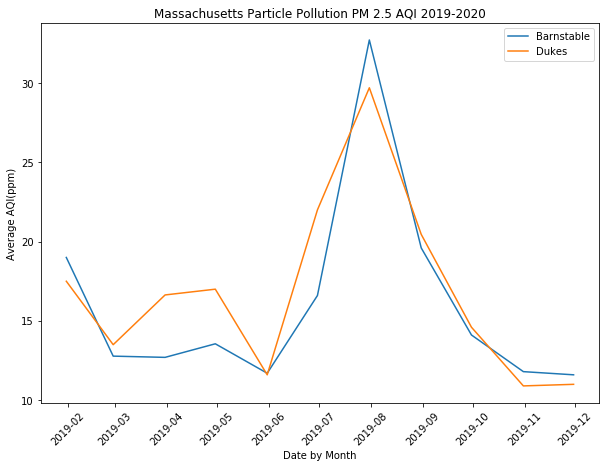

In [10]:
# Filter out the 1-hour sample_duration and fix any null values
sample_duration_pm = clean_mass_pm_df['sample_duration'] == '24 HOUR'
clean_mass_pm_df = clean_mass_pm_df[sample_duration_pm]

# Groupby date and fix null values
group_mass_pm = pd.DataFrame(clean_mass_pm_df.groupby(['date_local', 'county']).mean().unstack())
# group_mass = group_mass.fillna(0)

# Convert the date_local in the index into 'datetime' format
group_mass_pm.index = pd.to_datetime(group_mass_pm.index)

# Average out data on a per month basis
mass_monthly_pm = group_mass_pm.resample('M').mean()
mass_monthly_pm.head()

# Create first Line Chart for first_max_value of CO and data_local for Mass_df
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation = 45)
xvalue = mass_monthly_pm.index
yvalue = mass_monthly_pm['aqi']

plt.xlabel('Date by Month')
plt.ylabel('Average AQI(ppm)')
plt.title('Massachusetts Particle Pollution PM 2.5 AQI 2019-2020')
plt.plot(xvalue, yvalue)
plt.legend(yvalue)
fig.savefig('MassplotPM.png')
